<a href="https://colab.research.google.com/github/wwoliver19/Projects/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
weather = pd.read_csv('/content/drive/MyDrive/KSU/IT7143Cloud/Group Project/weather_classification_data.csv')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

traindata, testdata = train_test_split(weather, test_size=0.2)
traindata.shape, testdata.shape

((10560, 11), (2640, 11))

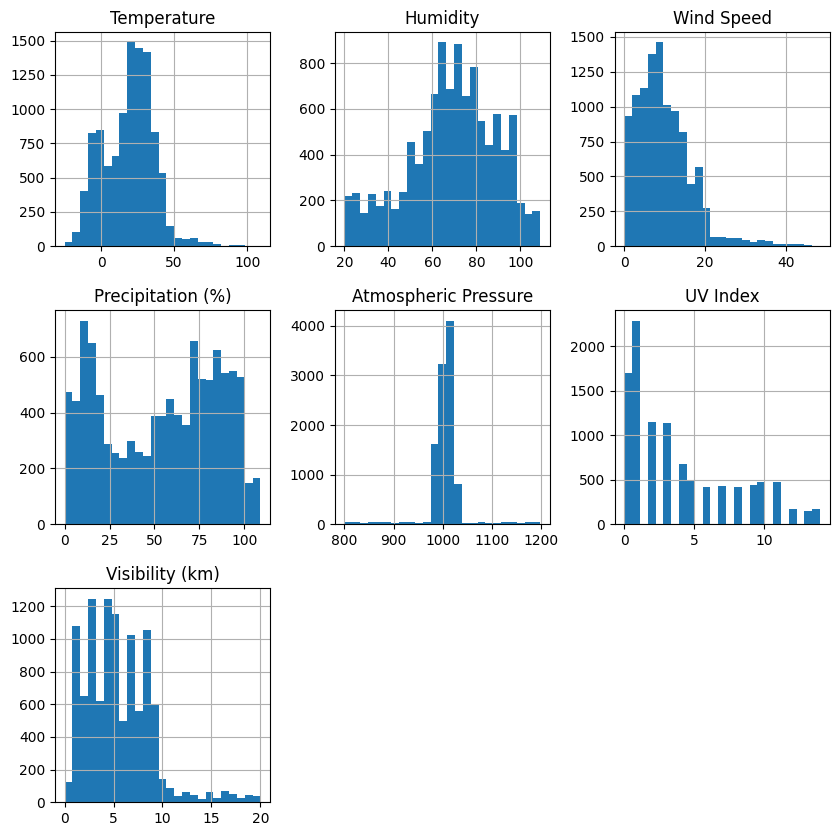

In [5]:
traindata.hist(bins=25, figsize=(10,10))
plt.show()

In [6]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [7]:
weather = weather.drop('Humidity', axis=1)

In [8]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Wind Speed            13200 non-null  float64
 2   Precipitation (%)     13200 non-null  float64
 3   Cloud Cover           13200 non-null  object 
 4   Atmospheric Pressure  13200 non-null  float64
 5   UV Index              13200 non-null  int64  
 6   Season                13200 non-null  object 
 7   Visibility (km)       13200 non-null  float64
 8   Location              13200 non-null  object 
 9   Weather Type          13200 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.0+ MB


In [9]:
numeric_cols = ['Precipitation (%)', 'Temperature', 'Atmospheric Pressure']
logistical_cols = ['UV Index', 'Wind Speed']
cat_cols = ['Cloud Cover', 'Season']
target = ['Weather Type']

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log transform', FunctionTransformer(log_transformation)),
    ('standardize', StandardScaler())
])

processing_pipeline = ColumnTransformer([
    ('numeric', num_pipeline, numeric_cols),
    ('log', log_pipeline, logistical_cols),
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols)

])

Decision Tree

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = Pipeline([
    ('processing', processing_pipeline),
    ('dtc',DecisionTreeClassifier())
])

param_grid = {
    'dtc__max_depth' : [6],
    'dtc__min_samples_split' : [0.3],
    'dtc__min_samples_leaf' : [0.3],
    'dtc__max_features' : [None],
    'dtc__max_leaf_nodes' : [None]
}

grid_search = GridSearchCV(dtc, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(traindata, traindata[target])

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Precipitation '
                                                                          '(%)',
                                                                          'Temperature',
                                                                          'Atmospheric '
                                                                          'Pressure']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          Functio...
                                                                          'Wind '
                                                                          'Speed']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_categories=5),
                                                                         ['Cloud '
                                                                          'Cover',
                                                                          'Season'])])),
                                       ('dtc', DecisionTreeClassifier())]),
             param_grid={'dtc__max_depth': [6], 'dtc__max_features': [None],
                         'dtc__max_leaf_nodes': [None],
                         'dtc__min_samples_leaf': [0.3],
                         'dtc__min_samples_split': [0.3]},
             return_train_score=True, scoring='accuracy')

In [11]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Precipitation (%)',
                                                   'Temperature',
                                                   'Atmospheric Pressure']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7a60c61df400>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['UV Index', 'Wind Speed']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season'])])),
                ('dtc',
                 DecisionTreeClassifier(max_depth=6, min_samples_leaf=0.3,
                                        min_samples_split=0.3))])

In [12]:
grid_search.best_score_

0.6493371212121213

In [13]:
grid_search.score(testdata, testdata[target])

0.65

Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


logistic_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('logistic', LogisticRegression())
])

param_grid = [{
    'logistic__C': [100]
}]

grid_search = GridSearchCV(logistic_pipeline, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(traindata, traindata[target].values.flatten())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Precipitation '
                                                                          '(%)',
                                                                          'Temperature',
                                                                          'Atmospheric '
                                                                          'Pressure']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log_transformation at 0x7a60c61df400>)),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['UV '
                                                                          'Index',
                                                                          'Wind '
                                                                          'Speed']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_categories=5),
                                                                         ['Cloud '
                                                                          'Cover',
                                                                          'Season'])])),
                                       ('logistic', LogisticRegression())]),
             param_grid=[{'logistic__C': [100]}], return_train_score=True,
             scoring='accuracy')

In [15]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Precipitation (%)',
                                                   'Temperature',
                                                   'Atmospheric Pressure']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7a60c61df400>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['UV Index', 'Wind Speed']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season'])])),
                ('logistic', LogisticRegression(C=100))])

In [16]:
grid_search.best_score_

0.8549242424242424

In [17]:
grid_search.score(testdata, testdata[target])

0.8496212121212121

Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfc = Pipeline([
    ('processing', processing_pipeline),
    ('rfc', RandomForestClassifier())
])

param_grid = [{
    'rfc__n_estimators' : [100],
    'rfc__max_depth' : [4],
    'rfc__min_samples_split' : [0.2],
    'rfc__min_samples_leaf' : [0.2],
    'rfc__max_features' : [None],
    'rfc__max_leaf_nodes' : [None]
}]

grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(traindata, traindata[target].values.flatten())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Precipitation '
                                                                          '(%)',
                                                                          'Temperature',
                                                                          'Atmospheric '
                                                                          'Pressure']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          Functio...
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_categories=5),
                                                                         ['Cloud '
                                                                          'Cover',
                                                                          'Season'])])),
                                       ('rfc', RandomForestClassifier())]),
             param_grid=[{'rfc__max_depth': [4], 'rfc__max_features': [None],
                          'rfc__max_leaf_nodes': [None],
                          'rfc__min_samples_leaf': [0.2],
                          'rfc__min_samples_split': [0.2],
                          'rfc__n_estimators': [100]}],
             return_train_score=True, scoring='accuracy')

In [19]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Precipitation (%)',
                                                   'Temperature',
                                                   'Atmospheric Pressure']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7a60c61df400>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['UV Index', 'Wind Speed']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season'])])),
                ('rfc',
                 RandomForestClassifier(max_depth=4, max_features=None,
                                        min_samples_leaf=0.2,
                                        min_samples_split=0.2))])

In [20]:
grid_search.best_score_

0.6862689393939394

In [21]:
grid_search.score(testdata, testdata[target])

0.6670454545454545

Stochastic Gradient Descent

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([
    ('processing', processing_pipeline),
    ('sgd', SGDClassifier())
])

param_grid = {
    'sgd__loss': ['log_loss'],
    'sgd__alpha': [0.001],
    'sgd__penalty': ['l1'],
    'sgd__max_iter': [1000],
    'sgd__eta0': [1]
}

grid_search = GridSearchCV(sgd, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(traindata, traindata[target].values.flatten())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['Precipitation '
                                                                          '(%)',
                                                                          'Temperature',
                                                                          'Atmospheric '
                                                                          'Pressure']),
                                                                        ('log',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          Functio...
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['UV '
                                                                          'Index',
                                                                          'Wind '
                                                                          'Speed']),
                                                                        ('class',
                                                                         OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                                       max_categories=5),
                                                                         ['Cloud '
                                                                          'Cover',
                                                                          'Season'])])),
                                       ('sgd', SGDClassifier())]),
             param_grid={'sgd__alpha': [0.001], 'sgd__eta0': [1],
                         'sgd__loss': ['log_loss'], 'sgd__max_iter': [1000],
                         'sgd__penalty': ['l1']},
             return_train_score=True, scoring='accuracy')

In [23]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['Precipitation (%)',
                                                   'Temperature',
                                                   'Atmospheric Pressure']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7a60c61df400>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['UV Index', 'Wind Speed']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['Cloud Cover', 'Season'])])),
                ('sgd',
                 SGDClassifier(alpha=0.001, eta0=1, loss='log_loss',
                               penalty='l1'))])

In [24]:
grid_search.best_score_

0.8047348484848484

In [25]:
grid_search.score(testdata, testdata[target])

0.8147727272727273

For this project, I chose a dataset that was focused on weather predictions. I wanted to predict the weather type based on features of precipitation %,temperature, atmospheric pressure, UV index, wind speed,cloud cover, season. I preprocessed the data to set out target, numeric, and logistical columns for any missing values, repeating values, and to keep the data on a similar scale. After I preprocessed, I took our processing pipeline to train our models. The models I chose for this project were Decision Tree, Random Forest, Logistic Regression, and for the self-research model, Stochastic Gradient Descent. I set the parameters for each model to the maximum value so that all the data was analyzed. The scores from each model were:

Decision Tree: 64.20%

Random Forest: 65.98%

Logistic Regression: 85.68%

Stochastic Gradient Descent: 79.20%

Based on these results, the Logistic Regression model produced the best fit for our dataset. This could be because Logstic Regression was able to find and fit patterns in the data better than the other models. The model that performed the worst for our dataset was Decision Tree. This could be because Decision Tree is not able to analyze the data as in-depth as the other models, even with the parameters set high. It was interesting to note that although they did not perform higher than Logistic Regression, Stochastic Gradient performed better than Random Forest. This could be because Stochastic Gradient can continiouly adjust the data parameters to improve model performance while Random Forest can only perform what it is given.

Link to dataset: https://www.kaggle.com/datasets/nikhil7280/weather-type-classification
